In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
df = pd.read_csv("../Week_1/AirQualityUCI.csv", sep=';', decimal=',')
df = df.dropna(axis=1, how='all').dropna(how='all').reset_index(drop=True)

In [4]:
X = df[['T', 'RH', 'AH', 'NOx(GT)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]
y = df['CO(GT)']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [7]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [10]:
print("=== Linear Regression ===")
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("RMSE:", rmse_rf)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

=== Linear Regression ===
RMSE: 48.4141925528011
RMSE: 53.790678524240626


In [11]:
print("\n=== Random Forest Regressor ===")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


=== Random Forest Regressor ===
R² Score: 0.6032691092362186
RMSE: 48.4141925528011


In [12]:
print("=== Linear Regression ===")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

print("\n=== Random Forest Regressor ===")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

=== Linear Regression ===
R² Score: 0.5102610156044767
RMSE: 53.790678524240626

=== Random Forest Regressor ===
R² Score: 0.6032691092362186
RMSE: 48.4141925528011


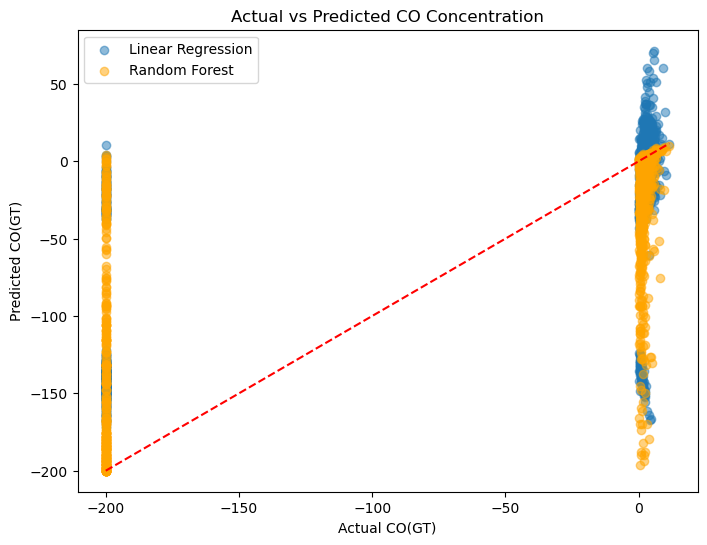

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest", color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("Actual vs Predicted CO Concentration")
plt.legend()
plt.show()


In [14]:
import os
os.makedirs("WEEK 1", exist_ok=True)
os.makedirs("WEEK 2", exist_ok=True)
